In [3]:
# ../BT4012_Reviews/Data/Raw/Sampled Yelp Review Data.csv
# Use this dataset first for eda ; it contains 100k rows 

```Numerical Variables EDA```

In [4]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [5]:
# import dataset
path = "../../Data/Raw/Sampled Yelp Review Data.csv"
df = pd.read_csv(path)
df.dropna()

,Unnamed: 0,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,670716,7/9/2010,9Nn0xmhNMD9W8W1z-UknIQ,0G-QF457q_0Z_jKqh6xWiA,I love sitting outside at the caf茅s that line ...,4,2,2,3,NR,8ljZdIJ-6j4PjR1EjzId7g
1,168448,5/23/2012,vbmplvJr4nZ1zKqGz6MebQ,AfIkqpTCtF28M2zNAj5rSA,"I live a block away from this place, and I dec...",4,0,0,0,NR,1p82vLo47SsW3aYZbxHipw
2,245044,2/27/2011,f17Q7D29xkJ_BQpIWcP2xg,pu_Aw_LpqAgUyaZkiY8HyA,The bbq pork sandwich is one of my great Rhode...,5,0,0,0,NR,5cdoxMpGrrwsoTTHYB1TIg
3,132348,4/21/2012,6Ie3C_G3-_Kc9izOPyznGA,axRg9Gsbq5-JznPkSGYlUQ,Definitely a gastronomic adventure and a uniqu...,5,0,2,0,NR,GJu1NAoV8VtoCdiw0mKKwQ
4,485478,1/27/2009,NLEzoWC2wHEIv7_c5uWdyQ,BfBC_x7SL7K2THafF6IM2w,What can I add that the 277 people before me d...,5,2,3,1,YR,u4ZOxRTE-9N9i-7iR8A4ig
...,...,...,...,...,...,...,...,...,...,...,...
99995,183465,Update - 10/3/2011,KhBsVDBmru2orepYMQm2IA,WWnhqRnWWjutMqh-2SzEuQ,Ever since my first visit to Angelini over a y...,5,7,4,5,YR,P9Dt_kkU5BTe1v0tJ4KFNw
99996,738481,8/17/2005,ZEeE1glfXudEtLD4HRIG_Q,G5LXEaxhQMF_BVjNHkVr7g,"I concur with Laurel's review, Booty Boutique ...",5,2,5,3,NR,kkJq2bfggGkdujVbT1x8aw
99997,546960,Update - 3/19/2012,A8RlzPRia6oGVxJT5zKN7Q,2bHSZhM0huV8LRh3YHaOSQ,I have to update to point out that they did re...,4,1,0,0,NR,ZrjQSOcrvu2oGTVuMK556w
99998,628674,5/16/2010,IByKqrEXnKC3a9HFpGeqrQ,RmXIjppHNtVveguN10iO1g,If Hill's Kitchen were two or three times the ...,4,8,7,3,NR,d7rjKQLAV5kagbGkjzaC5g


In [7]:
# select numerical columns
num_df = df[['reviewerID', 'date', 'rating', 'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'restaurantID']]
num_df.head()

,reviewerID,date,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,0G-QF457q_0Z_jKqh6xWiA,7/9/2010,4,2,2,3,NR,8ljZdIJ-6j4PjR1EjzId7g
1,AfIkqpTCtF28M2zNAj5rSA,5/23/2012,4,0,0,0,NR,1p82vLo47SsW3aYZbxHipw
2,pu_Aw_LpqAgUyaZkiY8HyA,2/27/2011,5,0,0,0,NR,5cdoxMpGrrwsoTTHYB1TIg
3,axRg9Gsbq5-JznPkSGYlUQ,4/21/2012,5,0,2,0,NR,GJu1NAoV8VtoCdiw0mKKwQ
4,BfBC_x7SL7K2THafF6IM2w,1/27/2009,5,2,3,1,YR,u4ZOxRTE-9N9i-7iR8A4ig


```Preliminary analysis for usefulCount, coolCount, funnyCount, and ratingCount on flagged```

In [8]:
#general count of variables

rating_count = num_df['rating'].value_counts().sort_index()
useful_count = num_df['usefulCount'].value_counts().sort_index()[:10]
cool_count = num_df['coolCount'].value_counts().sort_index()[:10]
funny_count = num_df['funnyCount'].value_counts().sort_index()[:10]
flagged_count = num_df['flagged'].value_counts().sort_index()

Text(0.5, 1.0, 'Funny')

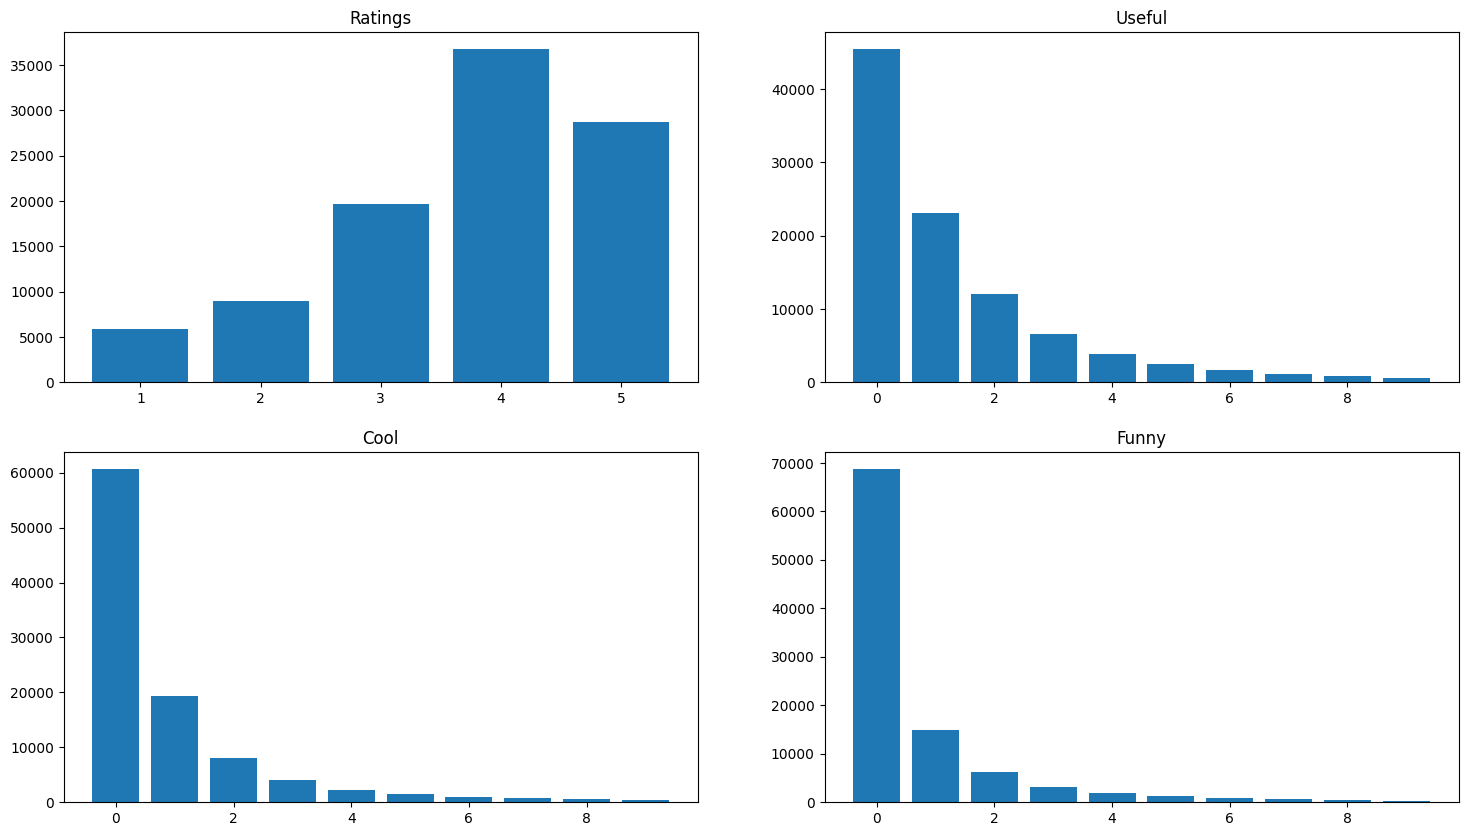

In [9]:
# individual histograms of variables
fig, axs = plt.subplots(2, 2, figsize=(18,10))

axs[0,0].bar(rating_count.index, rating_count)
axs[0,0].set_title('Ratings')

axs[0,1].bar(useful_count.index, useful_count)
axs[0,1].set_title('Useful')

axs[1,0].bar(cool_count.index, cool_count)
axs[1,0].set_title('Cool')

axs[1,1].bar(funny_count.index, funny_count)
axs[1,1].set_title('Funny')


```Clean date data and OHE```

In [10]:
#feature engineer date

#sort by date
num_df.sort_values('date')
#drop weird dates
num_df_clean = num_df[(num_df['date'].str.len() <= 10) | (num_df['date'].str.len() >= 8)]
num_df_clean = num_df_clean[~num_df_clean['date'].str.contains('Update')]
num_df_clean = num_df_clean[~num_df_clean['date'].str.contains('\n')]

#sort by dates
num_df_sorted = num_df_clean.sort_values('date')
num_df_sorted


,reviewerID,date,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
90664,4xTL7DOe8R4RmPQq3DhxEA,1/1/2006,3,0,0,2,N,u_Ze5HkcNXgECvYvKS0HLA
4392,xzNMMZNG-vImvP73tUsQKw,1/1/2006,2,1,0,0,YR,3vCuQ2D6EcmyBGT0vWj9yw
67350,xzNMMZNG-vImvP73tUsQKw,1/1/2006,4,0,1,0,YR,K1UJQICvFk6FaiuqgADGJg
20712,Bf87HcPERF9yiSjb2tQBqw,1/1/2006,4,9,3,7,NR,20vWBsWzv7PSkJ02W7wa7w
14177,WPRuJp0BhNdlgYXKZewpDg,1/1/2007,5,2,1,0,YR,AzseSGgDC6bVtMPEYo1CNQ
...,...,...,...,...,...,...,...,...
55173,XyWijCsGk442k1Q3k79tYw,9/9/2012,1,0,0,1,NR,m7mHwBxNTFz1SlWpTGNPeQ
22021,E1p1QZj9sYDkoWLnIX-qsA,9/9/2012,4,0,0,0,NR,OztAaZEEriHdPCbF18W4MQ
95970,wklmU8CM7czQQBuhOC4k9A,9/9/2012,5,0,0,0,NR,OKCorWqyLJl4NNg_dz7LOQ
72154,DRH27qFWsNjMF6dMBwOMGg,9/9/2012,4,0,0,0,NR,p-xf967EdzcVZVlzWfzjeQ


In [11]:
#OHE on dates

num_df_sorted['date'] = pd.to_datetime(num_df_sorted['date'])
num_df_sorted['year'] = num_df_sorted['date'].dt.year
num_df_sorted['month'] = num_df_sorted['date'].dt.month
num_df_sorted['day'] = num_df_sorted['date'].dt.day
num_df_sorted

,reviewerID,date,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,year,month,day
90664,4xTL7DOe8R4RmPQq3DhxEA,2006-01-01,3,0,0,2,N,u_Ze5HkcNXgECvYvKS0HLA,2006,1,1
4392,xzNMMZNG-vImvP73tUsQKw,2006-01-01,2,1,0,0,YR,3vCuQ2D6EcmyBGT0vWj9yw,2006,1,1
67350,xzNMMZNG-vImvP73tUsQKw,2006-01-01,4,0,1,0,YR,K1UJQICvFk6FaiuqgADGJg,2006,1,1
20712,Bf87HcPERF9yiSjb2tQBqw,2006-01-01,4,9,3,7,NR,20vWBsWzv7PSkJ02W7wa7w,2006,1,1
14177,WPRuJp0BhNdlgYXKZewpDg,2007-01-01,5,2,1,0,YR,AzseSGgDC6bVtMPEYo1CNQ,2007,1,1
...,...,...,...,...,...,...,...,...,...,...,...
55173,XyWijCsGk442k1Q3k79tYw,2012-09-09,1,0,0,1,NR,m7mHwBxNTFz1SlWpTGNPeQ,2012,9,9
22021,E1p1QZj9sYDkoWLnIX-qsA,2012-09-09,4,0,0,0,NR,OztAaZEEriHdPCbF18W4MQ,2012,9,9
95970,wklmU8CM7czQQBuhOC4k9A,2012-09-09,5,0,0,0,NR,OKCorWqyLJl4NNg_dz7LOQ,2012,9,9
72154,DRH27qFWsNjMF6dMBwOMGg,2012-09-09,4,0,0,0,NR,p-xf967EdzcVZVlzWfzjeQ,2012,9,9


```Reviews by Year and Month```

<Axes: xlabel='year', ylabel='count'>

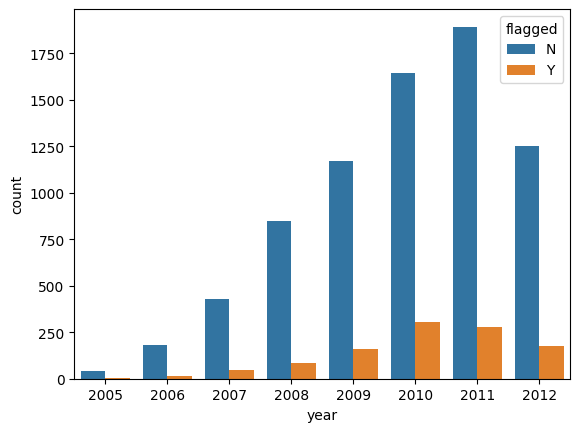

In [12]:
#reviews each year 
sns.countplot(x = 'year', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 'Y') | (num_df_sorted['flagged'] == 'N')])

<Axes: xlabel='month', ylabel='count'>

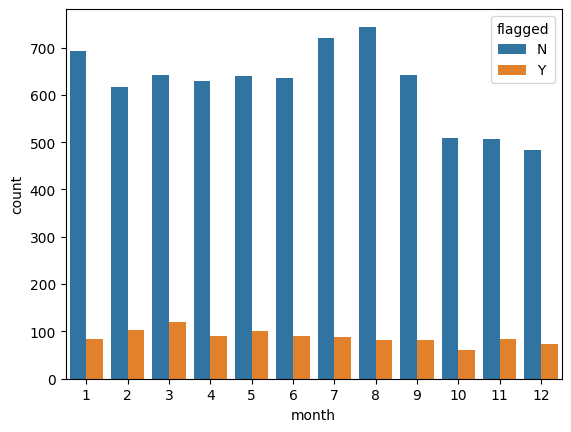

In [13]:
#reviews each month
sns.countplot(x = 'month', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 'Y') | (num_df_sorted['flagged'] == 'N')])

In [14]:
# too many reviewers / restaurants, unfeasible to do individual analysis
# len(num_df_sorted['reviewerID'].unique())
# len(num_df_sorted['restaurantID'].unique())

```Analysis on usefulCount, coolCount, and funnyCount on fraud```

<Axes: xlabel='usefulCount', ylabel='count'>

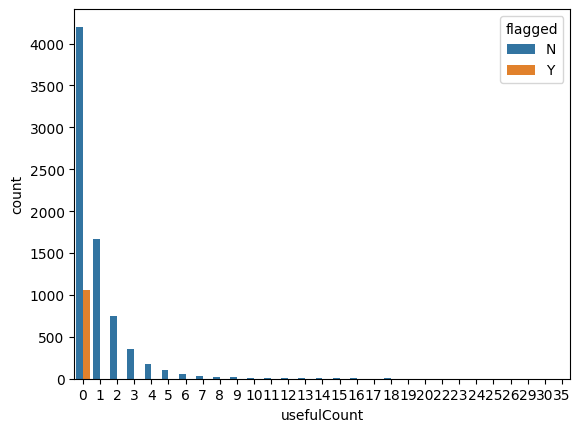

In [15]:
sns.countplot(x = 'usefulCount', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 'Y') | (num_df_sorted['flagged'] == 'N')])

In [16]:
#number of flagged reviews for reviewers that have received 1 or more 'useful' 'cool' or 'funny'
useful_flagged = len(num_df_sorted[(num_df_sorted['usefulCount'] > 0) & (num_df_sorted['flagged'] == 'Y')])
cool_flagged = len(num_df_sorted[(num_df_sorted['coolCount'] > 0) & (num_df_sorted['flagged'] == 'Y')])
funny_flagged = len(num_df_sorted[(num_df_sorted['funnyCount'] > 0) & (num_df_sorted['flagged'] == 'Y')])

print(f'usefulCount >= 1, flagged as fraud: {useful_flagged}')
print(f'coolCount >= 1, flagged as fraud: {cool_flagged}')
print(f'funnyCount >= 1, flagged as fraud: {funny_flagged}')

usefulCount >= 1, flagged as fraud: 0
coolCount >= 1, flagged as fraud: 0
funnyCount >= 1, flagged as fraud: 0


```Percentage of Flagged Reviews over normal reviews```

<Axes: xlabel='rating', ylabel='count'>

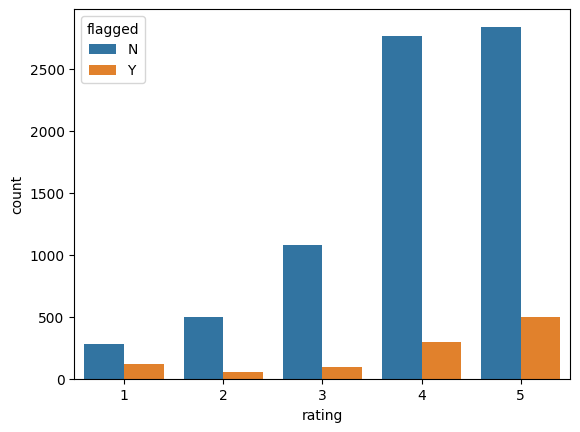

In [18]:
#flagged review count based on rating
sns.countplot(x = 'rating', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'].isin(['Y', 'N']))])

In [19]:
#percentage of fake reviews for each rating
ratio1 = len(num_df_sorted[(num_df_sorted['rating'] == 1) & (num_df_sorted['flagged'] == 'Y')])/len(num_df_sorted[(num_df_sorted['rating'] == 1)])
print(f'1 star rating: {ratio1*100}%')

ratio2 = len(num_df_sorted[(num_df_sorted['rating'] == 2) & (num_df_sorted['flagged'] == 'Y')])/len(num_df_sorted[(num_df_sorted['rating'] == 2)])
print(f'2 star rating: {ratio2*100}%')

ratio3 = len(num_df_sorted[(num_df_sorted['rating'] == 3) & (num_df_sorted['flagged'] == 'Y')])/len(num_df_sorted[(num_df_sorted['rating'] == 3)])
print(f'3 star rating: {ratio3*100}%')

ratio4 = len(num_df_sorted[(num_df_sorted['rating'] == 4) & (num_df_sorted['flagged'] == 'Y')])/len(num_df_sorted[(num_df_sorted['rating'] == 4)])
print(f'4 star rating: {ratio4*100}%')

ratio5 = len(num_df_sorted[(num_df_sorted['rating'] == 5) & (num_df_sorted['flagged'] == 'Y')])/len(num_df_sorted[(num_df_sorted['rating'] == 5)])
print(f'5 star rating: {ratio5*100}%')

1 star rating: 2.1739130434782608%
2 star rating: 0.6488991888760138%
3 star rating: 0.486860014658151%


4 star rating: 0.8255905071084741%
5 star rating: 1.8236970981653389%


In [ ]:
# len(num_df_sorted[(num_df_sorted['rating'] == 1)])
# len(num_df_sorted[(num_df_sorted['rating'] == 1) & (num_df_sorted['flagged'] == 'Y')])

119

```Correlation Matrix Implementation```

In [26]:
#changed flagged to numeric boolean
num_df_sorted['flagged_n'] = num_df_sorted['flagged'].apply(lambda x : 0 if x == "N" else 1)

In [27]:
#correlation matrix
corr_matrix = num_df_sorted.corr(numeric_only=True)
print(corr_matrix)

               rating  usefulCount  coolCount  funnyCount      year     month  \
rating       1.000000    -0.034703   0.068337   -0.049673 -0.001375  0.000162   
usefulCount -0.034703     1.000000   0.823792    0.690951 -0.098231 -0.008754   
coolCount    0.068337     0.823792   1.000000    0.774245 -0.097624 -0.007369   
funnyCount  -0.049673     0.690951   0.774245    1.000000 -0.061562 -0.010115   
year        -0.001375    -0.098231  -0.097624   -0.061562  1.000000 -0.144196   
month        0.000162    -0.008754  -0.007369   -0.010115 -0.144196  1.000000   
day          0.002773    -0.001338  -0.002331   -0.000302 -0.023555 -0.003783   
flagged_n   -0.064933     0.057914   0.048687    0.036915 -0.018615  0.007331   

                  day  flagged_n  
rating       0.002773  -0.064933  
usefulCount -0.001338   0.057914  
coolCount   -0.002331   0.048687  
funnyCount  -0.000302   0.036915  
year        -0.023555  -0.018615  
month       -0.003783   0.007331  
day          1.000000   0

```Correlation Matrix Heatmap```

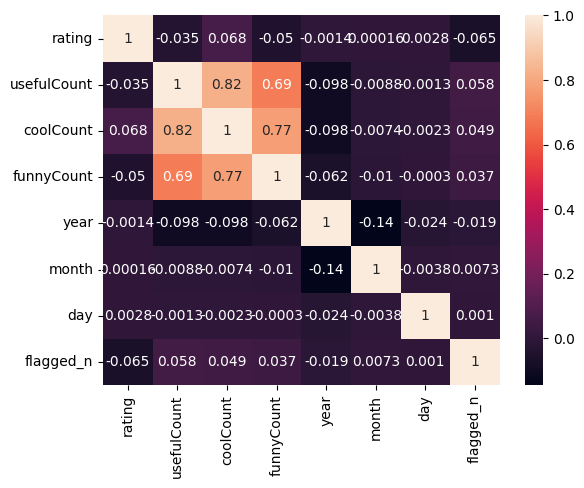

In [29]:
sns.heatmap(corr_matrix, annot=True)
plt.show()